In [1]:
# JobTrend prototype 5  -distiluse-base-multilingual-cased-v2
# 
# Sila. January 26, 2023

In [2]:
from google.colab import files
uploaded = files.upload()

Saving JobTrendAds_Transformer_Search_Clean.csv to JobTrendAds_Transformer_Search_Clean.csv


In [3]:
# Upload the JobTrendAds_Transformer_Search.csv file
!ls

JobTrendAds_Transformer_Search_Clean.csv  sample_data


In [4]:
# Read Jobfile
import pandas as pd

colnames=['Source.Name','ID', 'Date time', 'Details', 'Region', 'Pers.Komp', 'Pers.Komp.Value','Rest'] 
df = pd.read_csv("JobTrendAds_Transformer_Search_Clean.csv", usecols = colnames, encoding="utf-8", sep=';', header = 0 )

# The JobTrend file must saved in utf-8 format

In [5]:
df.rename(columns = {'Rest':'JobAdText'}, inplace = True)
df.rename(columns = {'Pers.Komp':'PersonligeKompetencer'}, inplace = True)
# show the data
print ( df .describe( include = 'all' ))
#the describe is a great way to get an overview of the data
#print ( df .values)

              Source.Name            ID         Date time             Details  \
count                 296  2.960000e+02               296                 296   
unique                296           NaN               289                 242   
top     00031-1805634.txt           NaN  21-02-2020 22:37  Multimediedesigner   
freq                    1           NaN                 2                   8   
mean                  NaN  1.053727e+06               NaN                 NaN   
std                   NaN  5.156326e+05               NaN                 NaN   
min                   NaN  7.153000e+03               NaN                 NaN   
25%                   NaN  6.856040e+05               NaN                 NaN   
50%                   NaN  1.080747e+06               NaN                 NaN   
75%                   NaN  1.446393e+06               NaN                 NaN   
max                   NaN  1.960349e+06               NaN                 NaN   

                    Region 

In [6]:
df.drop('Source.Name' , axis = 1 , inplace = True )
df.drop('Date time' , axis = 1 , inplace = True )
df.drop('Details' , axis = 1 , inplace = True )
df.drop('Region' , axis = 1 , inplace = True )

In [7]:
# Replace No-value with zero on Pers.Komp column
df["PersonligeKompetencer"] = df["PersonligeKompetencer"].fillna(0)

In [8]:
df['JobAdText'] = df['JobAdText'].apply(str)

for column in df.columns[3:]:
    print(df[column])

0      Så brænder du for online marketing? Kan du ska...
1      Beskrivelse af din motivation og dine kompeten...
2      Vi har rigtig travlt med at hjælpe vores kunde...
3      Vil du være med til at sætte kursen for Klasse...
4      Grafiker med kreativ snilde- Motiveres du af s...
                             ...                        
291                   ...eller  |                    ...
292                                              Stud...
293                    Praktikant i Multimedia design...
294              Webmaster til vores nye websiteVil d...
295                   ...eller  |                    ...
Name: JobAdText, Length: 296, dtype: object


In [9]:
# Could find sentences with regular expressions, SpaCy etc.
# (But) Using nltk here.

In [10]:
from nltk import tokenize

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nb_personal_qualifications = 0

# For start, only look at 1 row
for row in df.head(1).itertuples():
    AdText = row.JobAdText

    Sentences = tokenize.sent_tokenize(AdText)
    '''doc = nlp(AdText)
    Sentences = []
    for sent in doc.sents:
       Sentences.append(sent.text)'''
    
    # ToDo - This must read from Excel file
    nb_personal_qualifications = int(row[2]) # Pers.Komp

In [13]:
print(nb_personal_qualifications) #print(Sentences)

1


In [14]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 118.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4fb6f0064c5412985278bdd2d105d570c775ac1616482da595dc1390179c66da
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [15]:
from sentence_transformers import SentenceTransformer, util

In [16]:
# https://www.sbert.net/docs/pretrained_models.html#multi-lingual-models

model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [17]:
import numpy as np

In [18]:
def FindkHighestkNumbers(scores, k):
    return (-scores).argsort()[:k]

In [19]:
def PresentAsSubstring(CurrentSentences, LookupSentence, Verbose):
    foundmatch = False
    for value in CurrentSentences:
       # Find
       if (value.find(LookupSentence) != -1):
           if (Verbose==True):
              print(value, " Contains ", LookupSentence)
           foundmatch = True

    return foundmatch 

In [20]:
def QualificationPresentAsSubstring(CurrentSentences, qualifications, Verbose):
  FoundQualificationAsSubstring = False
  for i in range(len(qualifications)):
     Lookup_Sentence= qualifications[i]
     if (PresentAsSubstring(CurrentSentences, Lookup_Sentence, Verbose) == True):
        FoundQualificationAsSubstring = True
     
  return FoundQualificationAsSubstring      

In [21]:
def FindMostSimilarSentence(Corpus, LookupSentence):
    # encode corpus to get corpus embeddings
    corpus_embeddings = model.encode(Corpus, convert_to_tensor=True)
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(LookupSentence, convert_to_tensor=True)# top_k results to return
    top_k=1# compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]# Sort the results in decreasing order and get the first top_k
    # top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k] #CPU
    top_results= FindkHighestkNumbers(cos_scores,top_k) #GPU

    # print("\n", "Sentence:", LookupSentence, "\n")
    # print("Top", top_k, "most similar sentences in corpus:")
    best_result=0
    for idx in top_results[0:top_k]:
       #print(Corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))
       best_result= cos_scores[idx] 

    return Corpus[top_results[0]], best_result

In [22]:
target_sentence = "Har gode kommunikationsevner"

In [23]:
# Test
# FindMostSimilarSentences(Sentences, target_sentence) 
FindMostSimilarSentence(Sentences, target_sentence) 

('Har du flair for at arbejde med content og sociale medier?',
 tensor(0.1216, device='cuda:0'))

In [24]:
personal_qualifications=['Har gode kommunikationsevner',
'Kan arbejde selvmotiverende',
'Du tager ansvar for dine projekter og følger altid dine opgaver til dørs',
'Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.',
'Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst',
'Du har drive, og passion for kvalitet',
'Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende',
'er engageret, har god energi og er en god kollega',
'Som person er du først og fremmest kreativ og du er god til at finde på nye løsninger',
'Du er ansvarsfuld, selvstændig og har mod på at udvikle dig'
'Være initiativrig og opsøgende',
'Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig',
'Du er god til at skabe relationer på tværs',
'er selvstændig og grundig',
'Du har flair for content',
'Du er frisk, nede på jorden og klar på en god snak med dine kollegaer',
'Du trives med rutineprægede opgaver, og bidrager med masser af godt humør',
'Er optimist og ser muligheder fremfor begrænsninger',
'Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen.Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen',
'Som menneske er du udadvendt, opsøgende og pædagogisk',
'Er kvalitetsbevidst og sætter en stolthed i at udføre et godt stykke arbejde',
'Er detaljeorienteret og har en struktureret tilgang til dine arbejdsopgaver',
'Er god til at tale med mennesker og sætte sig ind i deres behov',
'Du er detaljeorienteret til mindste detalje og stortrives med en bred kontaktflade',
'Du er struktureret og har høj selvdisciplin',
'Du udviser en høj grad af uafhængighed, er proaktiv og selvstartende',
'Vi søger en person, der er detaljeorienteret og analytisk stærk',
'Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team',
'er ansvarlig, struktureret og målorienteret samt serviceminded, positiv og imødekommende',
'Kreativ, nysgerrig, initiativrig og ikke bange for at spørge. Struktureret og detaljeorienteret',
'At du har et godt drive, kan arbejde selvstændigt, struktureret og tage ansvar',
'Du er god til at styre din tid og trives med at have mange bolde i luften']

In [25]:
def FindPersonalQualificationsVerbose(Corpus):
  for i in range(len(personal_qualifications)):
     Lookup_Sentence=personal_qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Sentences, Lookup_Sentence)
     print(Lookup_Sentence)
     print(bestmatch, bestmatchvalue)

In [26]:
# Find best matches, above threshold

In [27]:
def FindQualifications(Corpus, qualifications):
  highvalue=0
  highestmatchedsentence=""
  highestlookup=""
  for i in range(len(qualifications)):
     Lookup_Sentence= qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Corpus, Lookup_Sentence)

     if bestmatchvalue.cpu().detach().numpy()>highvalue: 
        highvalue = bestmatchvalue.cpu().detach().numpy() 
        highestmatchedsentence = bestmatch
        highestlookup=Lookup_Sentence
  return highestmatchedsentence,highestlookup,highvalue

In [28]:
def FindTopQualification(Corpus, qualifications, typeofqualification, UseVerbose):
    highestmatchedsentence,highestlookup,highvalue = FindQualifications(Corpus, qualifications)

    if UseVerbose == True:
       print("\n")
       print(typeofqualification,"qualifications in JobAds.")
    
    print("Match :", highestmatchedsentence)
    print('Lookup: ', highestlookup)
    print('Match: ', "(Score: %.4f)" % (highvalue))

    return highvalue

In [29]:
FindTopQualification(Sentences, personal_qualifications, "Personal", True)



Personal qualifications in JobAds.
Match : Har du flair for at arbejde med content og sociale medier?
Lookup:  Du har flair for content
Match:  (Score: 0.5371)


array(0.5371063, dtype=float32)

In [30]:
def FindTopQualificationsForDataSet(threshold):
   true_positives = 0
   false_negatives = 0
   false_positives = 0
   true_negatives = 0
   ad_number=1
   # Run Through entire dataset 
   for row in df.head(100).itertuples():
       AdText = row.JobAdText

       Sentences = tokenize.sent_tokenize(AdText)

       # This must be read from Excel file
       nb_personal_qualifications = int(row.PersonligeKompetencer)
       y_real.append(row.PersonligeKompetencer)

       ad_number += 1
       print("Ad number: ", ad_number)
        
       '''matchingvalue = 0
       MatchAsSubString = QualificationPresentAsSubstring(Sentences, personal_qualifications, True)
       if (MatchAsSubString== True):
           print("Exact match. Assume matching value equal to 1")
           matchingvalue = 1 
           y_predicted.append(1)
       else:'''
       matchingvalue = FindTopQualification(Sentences, personal_qualifications, "Personal", False)
       if (matchingvalue>threshold):
          y_predicted.append(1)
       else:
          y_predicted.append(0)

       if (nb_personal_qualifications==1):
          if (matchingvalue<threshold):
              print("WRONG")
       else:
          if (matchingvalue>threshold):
              print("WRONG")

       if nb_personal_qualifications == 1:
           if (matchingvalue>threshold): 
              true_positives += 1
           else:
              false_negatives += 1
       else:
           if (matchingvalue>threshold): 
              false_positives += 1
           else:
              true_negatives += 1
              
   return true_positives, false_negatives, false_positives, true_negatives

In [31]:
y_real=[]
y_predicted=[]
true_positives, false_negatives, false_positives, true_negatives = FindTopQualificationsForDataSet(0.7)

if (false_positives + true_negatives) != 0:   
    if (true_positives + false_negatives) != 0:  
        print("False postive rate: ", (false_positives / float(false_positives + true_negatives)))
        print("True postive rate: ", (true_positives / float(true_positives + false_negatives)))

Ad number:  2
Match : Har du flair for at arbejde med content og sociale medier?
Lookup:  Du har flair for content
Match:  (Score: 0.5371)
WRONG
Ad number:  3
Match : Beskrivelse af din motivation og dine kompetencer for at være støtteperson/mentor  • Beskrivelse af dit eventuelle kendskab til studiestedet og/eller faget  Din ansøgning videresendes til den studerende.
Lookup:  Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig
Match:  (Score: 0.3372)
Ad number:  4
Match : Hvem er du: Du skal kunne se det spændende i, at blive en del af et lille team og med muligheden for at arbejde tæt på beslutningerne.
Lookup:  Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team
Match:  (Score: 0.6582)
Ad number:  5
Match : Du får både indflydelse og frihed til at være kreativ og proaktiv i en virksomhed, som ikke er bange for at gå nye veje både teknologisk, visuelt og grafisk
Lookup:  Kreativ, nysgerrig, initiativrig 

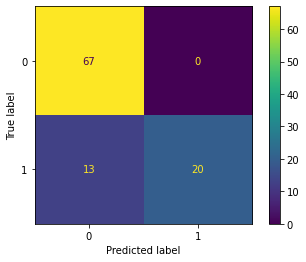

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For the JobTrendAds_Transformer_Search.csc file we get:
cm = confusion_matrix(y_real, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def PlotRocCurve():

   # false positive rate
   fpr = []
   # true positive rate
   tpr = []
   # Iterate thresholds from 0.0, 0.1, ... 1.0
   thresholds = np.arange(0.0, 1.01, .1)

   # iterate through all thresholds and determine fraction of true positives
   # and false positives found at this threshold
   for thresh in thresholds:       
       true_positives, false_negatives, false_positives, true_negatives = FindTopQualificationsForDataSet(thresh)

       if (false_positives + true_negatives) != 0:   
         if (true_positives + false_negatives) != 0:  
            fpr.append(false_positives / float(false_positives + true_negatives))
            tpr.append(true_positives / float(true_positives + false_negatives))
     
   plt.scatter(fpr, tpr)

   ypoints = np.array([0, 1])
   plt.plot(ypoints, linestyle = 'dotted')

   plt.show()

   return fpr, tpr

Ad number:  2
Match : Har du flair for at arbejde med content og sociale medier?
Lookup:  Du har flair for content
Match:  (Score: 0.5371)
Ad number:  3
Match : Beskrivelse af din motivation og dine kompetencer for at være støtteperson/mentor  • Beskrivelse af dit eventuelle kendskab til studiestedet og/eller faget  Din ansøgning videresendes til den studerende.
Lookup:  Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig
Match:  (Score: 0.3372)
WRONG
Ad number:  4
Match : Hvem er du: Du skal kunne se det spændende i, at blive en del af et lille team og med muligheden for at arbejde tæt på beslutningerne.
Lookup:  Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team
Match:  (Score: 0.6582)
WRONG
Ad number:  5
Match : Du får både indflydelse og frihed til at være kreativ og proaktiv i en virksomhed, som ikke er bange for at gå nye veje både teknologisk, visuelt og grafisk
Lookup:  Kreativ, nysgerrig, initiat

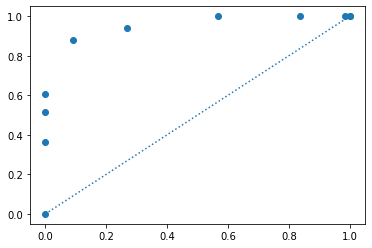

In [35]:
y_real=[]
y_predicted=[]
fpr, tpr = PlotRocCurve()

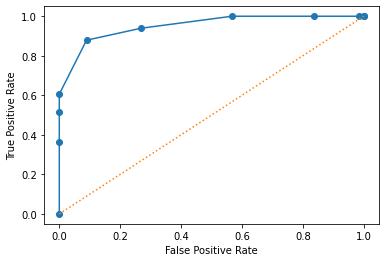

In [36]:
#create ROC curve
plt.scatter(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ypoints = np.array([0, 1])
plt.plot(ypoints, linestyle = 'dotted')
plt.show()

In [47]:
# Example
# See how similar sentences are processed
def ExampleFindMostSimilarSentence(Corpus, LookupSentence):
    # encode corpus to get corpus embeddings
    corpus_embeddings = model.encode(Corpus, convert_to_tensor=True)
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(LookupSentence, convert_to_tensor=True)# top_k results to return
    top_k=5# compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]# Sort the results in decreasing order and get the first top_k
    # top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k] #CPU
    top_results= FindkHighestkNumbers(cos_scores,top_k) #GPU

    # print("\n", "Sentence:", LookupSentence, "\n")
    # print("Top", top_k, "most similar sentences in corpus:")
    best_result=0
    for idx in top_results[0:top_k]:
       print(Corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))
       best_result= cos_scores[idx] 

    return Corpus[top_results[0]], best_result

In [48]:
Sentences = ['Du tager ansvar for dine projekter', 'du tager ansvar for dine opgaver', 'du har stor pligtfølelse omkring projekterne', 'Pligt er vigtig for dig i dine projekter', 'Du er glad for at gå i biografen'] 
lookup = 'Du tager ansvar for dine projekter'
ExampleFindMostSimilarSentence(Sentences, lookup)

Du tager ansvar for dine projekter (Score: 1.0000)
du tager ansvar for dine opgaver (Score: 0.8045)
du har stor pligtfølelse omkring projekterne (Score: 0.7530)
Pligt er vigtig for dig i dine projekter (Score: 0.7059)
Du er glad for at gå i biografen (Score: 0.1843)


('Du tager ansvar for dine projekter', tensor(0.1843, device='cuda:0'))